<a href="https://colab.research.google.com/github/Dose-of-Lux/Customer-Shopping-Trends/blob/main/Final_Project_Customer_Shopping_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/Dose-of-Lux/Customer-Shopping-Trends/refs/heads/main/shopping_trends.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

###Check and count missing value if any

In [ ]:
missing_values = df.isnull().sum()

###Check and display columns with missing value

In [ ]:
missing_values[missing_values > 0]

,0


In [ ]:
print(df.isnull().sum())

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


###Check any duplicate rows

In [ ]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [ ]:
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


###Clean duplicated (if any)

In [ ]:
df_cleaned = df.drop_duplicates()

###Make sure to remove duplicates

In [ ]:
print(f"New dataset shape: {df_cleaned.shape}")

New dataset shape: (3900, 19)


###Convert categorical columns (Gender, Category, Payment Method, etc.) to appropriate types

####Check which columns are categorical

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')


####Convert categorical columns to 'category' dtype to improve memory

In [ ]:
for col in categorical_columns:
  df[col] = df[col].astype('category')

####Review the changes

In [ ]:
print(df.dtypes)

Customer ID                    int64
Age                            int64
Gender                      category
Item Purchased              category
Category                    category
Purchase Amount (USD)          int64
Location                    category
Size                        category
Color                       category
Season                      category
Review Rating                float64
Subscription Status         category
Payment Method              category
Shipping Type               category
Discount Applied            category
Promo Code Used             category
Previous Purchases             int64
Preferred Payment Method    category
Frequency of Purchases      category
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer ID               3900 non-null   int64   
 1   Age                       3900 non-null   int64   
 2   Gender                    3900 non-null   category
 3   Item Purchased            3900 non-null   category
 4   Category                  3900 non-null   category
 5   Purchase Amount (USD)     3900 non-null   int64   
 6   Location                  3900 non-null   category
 7   Size                      3900 non-null   category
 8   Color                     3900 non-null   category
 9   Season                    3900 non-null   category
 10  Review Rating             3900 non-null   float64 
 11  Subscription Status       3900 non-null   category
 12  Payment Method            3900 non-null   category
 13  Shipping Type             3900 non-null   catego

###Identify if any numerical columns stored as objects. And the result here shows displayed as numbers, so it's correct numeric format (int or float)

In [ ]:
numeric_columns = ['Purchase Amount (USD)', 'Review Rating']
for col in numeric_columns:
  print(f"{col} unique values: {df[col].unique()[:10]}")

Purchase Amount (USD) unique values: [53 64 73 90 49 20 85 34 97 31]
Review Rating unique values: [3.1 3.5 2.7 2.9 3.2 2.6 4.8 4.1 4.9 4.5]


### Ensure categorical values are consistent (for ex: no typos in Gender: “Male” vs. “male”)

####Check column of categorical

In [ ]:
categorical_columns = ['Gender', 'Category', 'Payment Method']

####Print unique value for these categorical column

In [ ]:
for col in categorical_columns:
    print(f"{col} unique values: {df[col].unique()}")

Gender unique values: ['Male', 'Female']
Categories (2, object): ['Female', 'Male']
Category unique values: ['Clothing', 'Footwear', 'Outerwear', 'Accessories']
Categories (4, object): ['Accessories', 'Clothing', 'Footwear', 'Outerwear']
Payment Method unique values: ['Credit Card', 'Bank Transfer', 'Cash', 'PayPal', 'Venmo', 'Debit Card']
Categories (6, object): ['Bank Transfer', 'Cash', 'Credit Card', 'Debit Card', 'PayPal', 'Venmo']


####Convert Text to a Standard Format

In [ ]:
df['Gender'] = df['Gender'].str.strip().str.title()  # "male" → "Male"
df['Category'] = df['Category'].str.strip().str.title()  # "electronics" → "Electronics"
df['Payment Method'] = df['Payment Method'].str.strip().str.title()  # "credit card" → "Credit Card"

#### To confirm all values are now consistent

In [ ]:
for col in categorical_columns:
    print(f"{col} unique values after cleaning: {df[col].unique()}")

Gender unique values after cleaning: ['Male' 'Female']
Category unique values after cleaning: ['Clothing' 'Footwear' 'Outerwear' 'Accessories']
Payment Method unique values after cleaning: ['Credit Card' 'Bank Transfer' 'Cash' 'Paypal' 'Venmo' 'Debit Card']


####Check unique values in Discount Applied and Promo Code Used

In [ ]:
print("Discount Applied unique values:", df['Discount Applied'].unique())
print("Promo Code Used unique values:", df['Promo Code Used'].unique())

Discount Applied unique values: ['Yes', 'No']
Categories (2, object): ['No', 'Yes']
Promo Code Used unique values: ['Yes', 'No']
Categories (2, object): ['No', 'Yes']


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer ID               3900 non-null   int64   
 1   Age                       3900 non-null   int64   
 2   Gender                    3900 non-null   object  
 3   Item Purchased            3900 non-null   category
 4   Category                  3900 non-null   object  
 5   Purchase Amount (USD)     3900 non-null   int64   
 6   Location                  3900 non-null   category
 7   Size                      3900 non-null   category
 8   Color                     3900 non-null   category
 9   Season                    3900 non-null   category
 10  Review Rating             3900 non-null   float64 
 11  Subscription Status       3900 non-null   category
 12  Payment Method            3900 non-null   object  
 13  Shipping Type             3900 non-null   catego

In [ ]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Paypal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


####Shows mean, min, max, and distribution of values

In [ ]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


####Count of Each Category

<ipython-input-33-f8fca5c68608>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


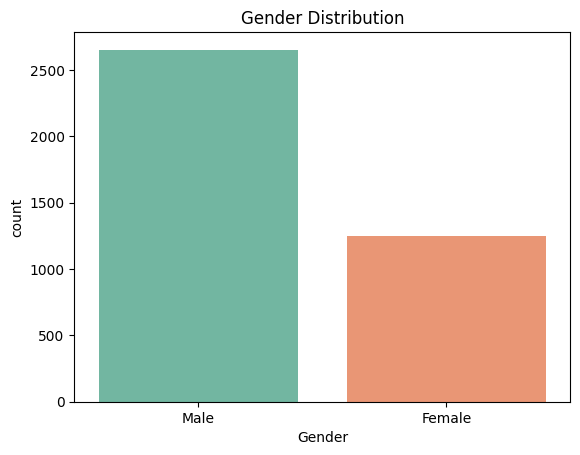

In [ ]:
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.show()

<ipython-input-50-d947eb27eb4c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Purchase Amount (USD)', data=df, estimator=sum, palette='coolwarm')


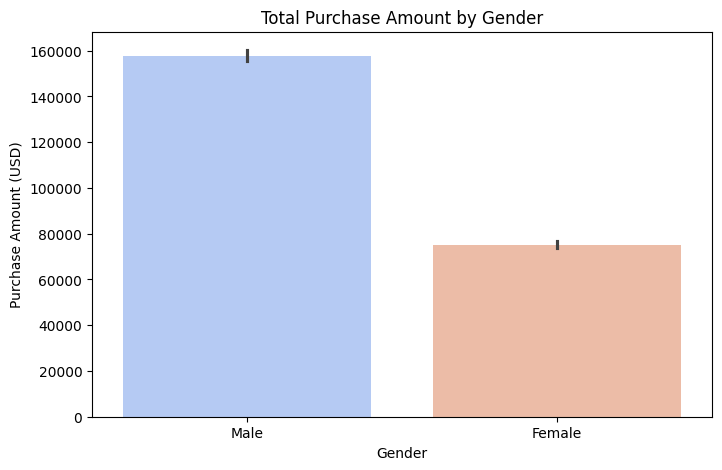

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Purchase Amount (USD)', data=df, estimator=sum, palette='coolwarm')
plt.title('Total Purchase Amount by Gender')
plt.show()
#So Males spend more than Females

####Average Purchase Amount by Category

<ipython-input-52-ff1344ed3d31>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Purchase Amount (USD)', data=df, estimator=sum, palette='coolwarm')


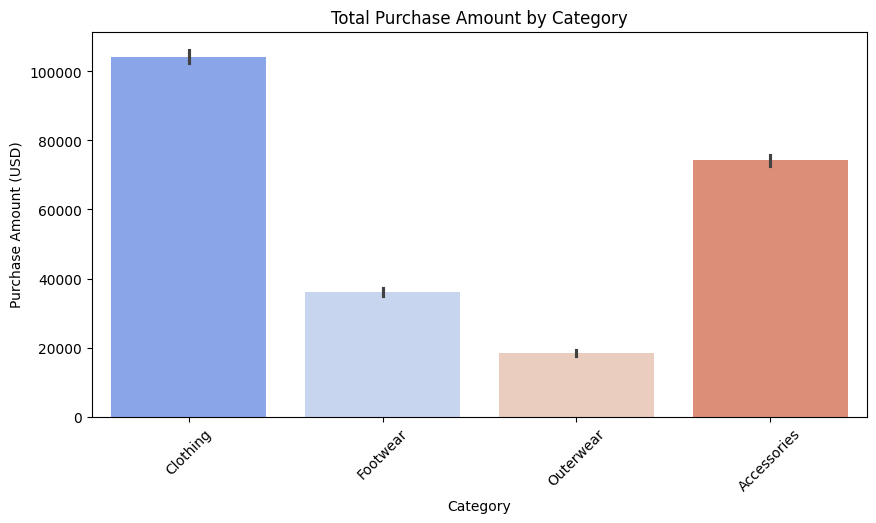

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Category', y='Purchase Amount (USD)', data=df, estimator=sum, palette='coolwarm')
plt.title('Total Purchase Amount by Category')
plt.xticks(rotation=45)
plt.show()
#Clothing and Accessories generates most revenue

####Purchase Amount by Gender

<ipython-input-35-f2e017cc7d25>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df, palette='Set1')


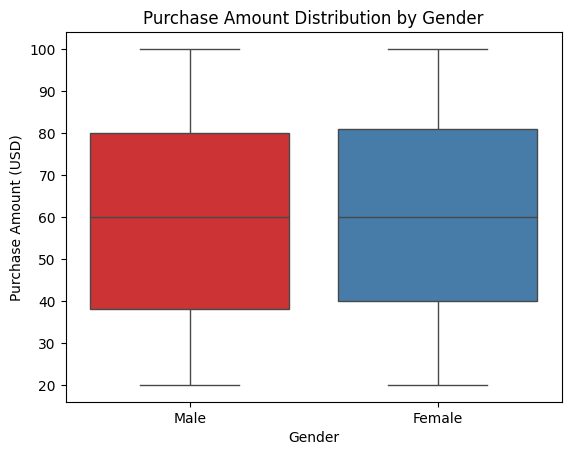

In [ ]:
sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df, palette='Set1')
plt.title('Purchase Amount Distribution by Gender')
plt.show()

<ipython-input-53-5916a34ed2fb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Payment Method', y='Purchase Amount (USD)', data=df, palette='pastel')


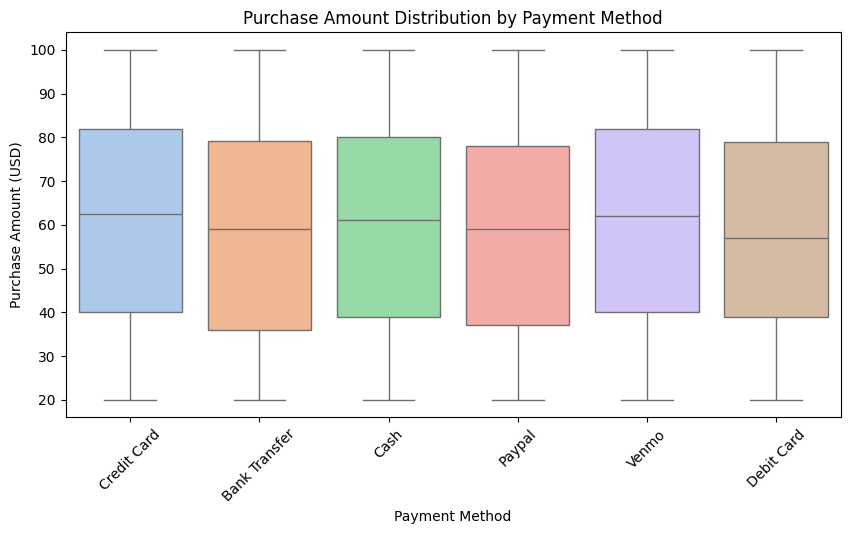

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Payment Method', y='Purchase Amount (USD)', data=df, palette='pastel')
plt.xticks(rotation=45)
plt.title('Purchase Amount Distribution by Payment Method')
plt.show()

####Count of Promo Code Used

<ipython-input-36-4c53b8068940>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Promo Code Used', data=df, palette='cool')


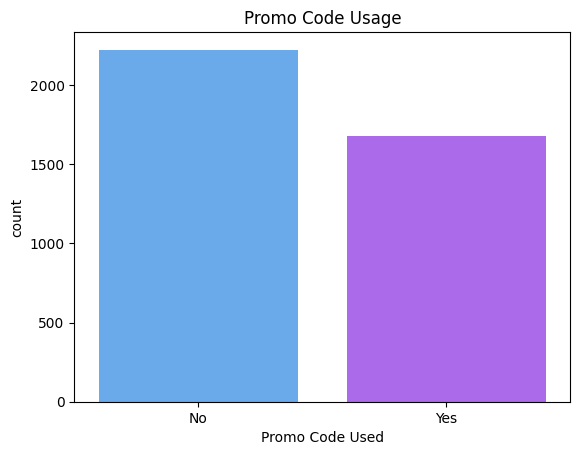

In [ ]:
sns.countplot(x='Promo Code Used', data=df, palette='cool')
plt.title('Promo Code Usage')
plt.show()

####Using a promo code impact the purchase amount

<ipython-input-55-ebb530190433>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Promo Code Used', y='Purchase Amount (USD)', data=df, palette='Set2')


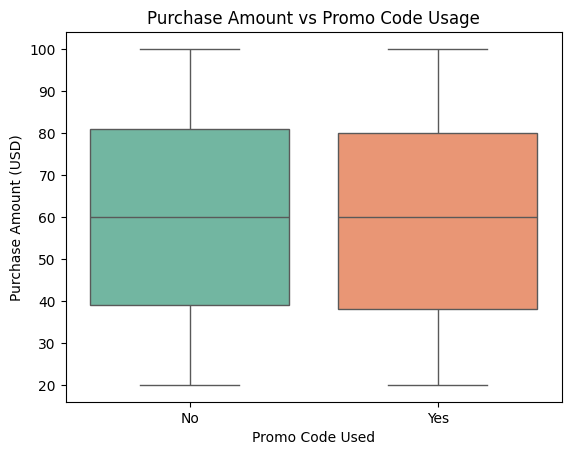

In [ ]:
sns.boxplot(x='Promo Code Used', y='Purchase Amount (USD)', data=df, palette='Set2')
plt.title('Purchase Amount vs Promo Code Usage')
plt.show()
#Both groups have nearly the same median spending (~$60), so using a promo code doesn’t significantly increase or decrease spending
#Some customers spend as low as $20 and as high as $100, regardless of promo code usage
#No extreme outliers, meaning most customers spend within a typical range

In [ ]:
corr_matrix = df.corr()

ValueError: could not convert string to float: 'Fortnightly'

####select only numeric columns like Purchase Amount (USD) and Review Rating

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

In [ ]:
corr_matrix = numeric_df.corr()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

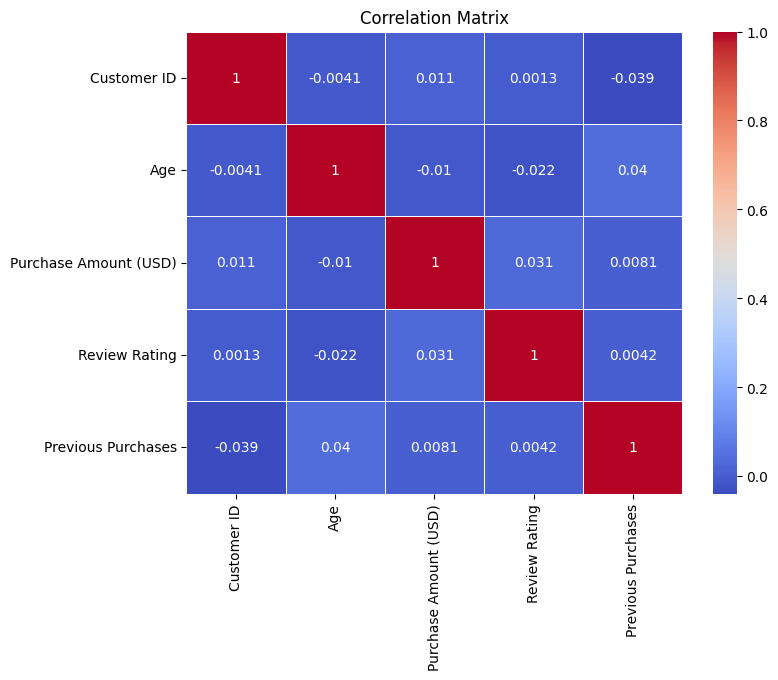

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
#Age has no significant impact on how much customers spend
#The number of past purchases does not strongly predict the purchase amount
#There’s no clear trend that higher review ratings lead to higher spending

###Find Top 10 Customers by Purchase Amount (USD)

In [ ]:
top_spenders = df.groupby('Customer ID')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(10)

In [ ]:
print("Top 10 Customers by Total Spending:")
print(top_spenders)

Top 10 Customers by Total Spending:
Customer ID
2843    100
96      100
582     100
1422    100
3838    100
862     100
2215    100
1592    100
1457    100
244     100
Name: Purchase Amount (USD), dtype: int64


In [ ]:
df['Purchase Amount (USD)'].describe()
#Customers are limited to a max spend of $100
#High spenders are all spending the max amount, meaning they might be under-represented in further analysis

,Purchase Amount (USD)
count,3900.000000
mean,59.764359
std,23.685392
min,20.000000
25%,39.000000
50%,60.000000
75%,81.000000
max,100.000000


###Convert dataframe to Excel

In [ ]:
!pip install openpyxl

In [ ]:
excel_filename = "/content/shopping_trends.xlsx"
df.to_excel(excel_filename, index=False, engine='openpyxl')
print("Excel file saved successfully!")

Excel file saved successfully!


In [ ]:
#Download file excel to computer
from google.colab import files
files.download(excel_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>